# Anomaly Detection

# # Outline
- [ 1 - Packages ](#1)
- [ 2 - Anomaly detection](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2  Dataset](#2.2)
  - [ 2.3 Gaussian distribution](#2.3)
 

## <a name="1"></a>
## 1 - Packages 

- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

## <a name="2"></a>
## 2 - Anomaly detection

<a name="2.1"></a>
### 2.1 Problem Statement
The goal of this project is to develop an anomaly detection algorithm to detect anomalous behavior in server computers. The project will use a Gaussian model to identify anomalous examples in an unlabeled dataset of server behavior containing two features - throughput (mb/s) and latency (ms) of response of each server.

The project aims to visualize the algorithm's workings on a 2D dataset by fitting a Gaussian distribution and identifying values with low probability that can be considered anomalies. The algorithm will then be applied to a larger dataset with multiple dimensions to identify anomalous behavior in server operations.

Ultimately, the project's objective is to improve server monitoring and maintenance by detecting and addressing anomalous behavior that may indicate potential system failures or security breaches.

<a name="2.2"></a>
### 2.2  Dataset


- The `load_data()` function shown below loads the data into the variables `X_train`, `X_val` and `y_val` 
    - We will use `X_train` to fit a Gaussian distribution 
    - We will use `X_val` and `y_val` as a cross validation set to select a threshold and determine anomalous vs normal examples

In [26]:
def load_data():
    X = np.load("X_train.npy")
    X_val = np.load("X_val.npy")
    y_val = np.load("y_val.npy")
    return X, X_val, y_val


In [27]:
# Load the dataset
X_train, X_val, y_val = load_data()

#### View the variables

In [28]:
print("The first 5 elements of X_train are:\n", X_train[:5])  

The first 5 elements of X_train are:
 [[ 6.65311366e+00  1.36897016e+01  1.75528453e+01 -1.19334974e+01
  -5.75640883e+00  1.54359213e+01 -1.21367520e+01  8.22412257e+00
  -4.88402408e+00  5.34933534e+00  1.73513724e+01]
 [-5.63054206e+00 -1.89376673e+01  1.86446242e+01 -6.15582498e+00
  -2.59888637e+01  1.54095532e+01 -1.65955163e+01  9.45465367e+00
  -2.87717344e+00 -6.00942041e+00  1.92106361e+01]
 [ 9.72152507e+00 -9.98248898e+00  1.55714341e+01 -3.22242657e+01
  -5.59579923e+00  2.43213827e+01  8.32773533e-01  1.07945546e+01
   7.27574802e-01  1.03929750e+01  7.08599490e+00]
 [-4.63576572e+00 -1.07160396e+01  2.03565706e+01 -9.00209733e+00
  -4.92056907e+00 -4.26195747e+00 -1.30582878e+00  9.49980333e-01
  -8.63410656e+00  1.98445438e-01  6.77141253e-03]
 [-1.28410444e+01 -2.03883132e+01  9.49193648e+00 -7.03850017e+00
  -9.92108683e+00 -3.71610505e+00 -9.38473043e+00 -2.32553355e+00
  -1.35185624e+01  1.10070290e+01  1.40032103e+01]]


In [29]:
print("The first 5 elements of X_val are\n", X_val[:5])  

The first 5 elements of X_val are
 [[ 18.27128267 -12.35926827   5.00096952   1.61147203   1.08859249
   29.3144101   -8.31353105  36.4383382   -9.47667866 -25.92818273
    7.10862793]
 [ -3.19306995 -19.70582077   6.52855559 -21.57085816   3.05055568
   23.4775029   -1.13341996  12.6884094  -10.96830111  -1.1986661
    1.90844104]
 [ -5.25667809 -12.9187198   25.43514141  -7.23156841   3.647838
   12.3665496   -6.51207592   8.75090211  -0.76875452  -3.26109447
   13.72947446]
 [ 12.95317634 -10.35033255  19.85785757 -24.42460793   3.26610539
   30.44529438 -11.12584192  12.8156288    9.3513545   -6.11362363
   17.62737508]
 [  3.76381878  -5.72818695  11.40016869 -17.55529729  -6.24657629
   16.1559693   -9.72475754  16.99661562  -5.16865431   0.1879945
   11.40123384]]


In [30]:
print("The first 5 elements of y_val are\n", y_val[:5]) 

The first 5 elements of y_val are
 [1 0 0 1 0]


#### Check the dimensions of your variables

In [31]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of X_val is:', X_val.shape)
print ('The shape of y_val is: ', y_val.shape)

The shape of X_train is: (1000, 11)
The shape of X_val is: (100, 11)
The shape of y_val is:  (100,)


#### Visualize your data

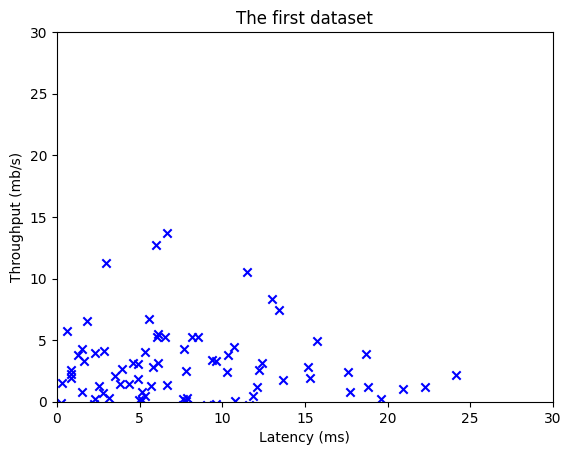

In [32]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b') 

# Set the title
plt.title("The first dataset")
# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

### <a name="2.3"></a>
### 2.3 Gaussian distribution

### 2.3.1 Estimating parameters for a Gaussian distribution

In [33]:

def estimate_gaussian(X): 
    
    m, n = X.shape
   
    mu = 1 / m * np.sum(X, axis = 0)
    var = 1 / m * np.sum((X - mu) ** 2, axis = 0)
   
    return mu, var

In [34]:
mu, var = estimate_gaussian(X_train)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)
    

Mean of each feature: [  4.93940034  -9.63726819  13.81470749 -10.4644888   -7.95622922
  10.19950372  -6.01940755   7.96982896  -6.2531819    2.32451289
   8.47372252]
Variance of each feature: [60.97489373 53.20572186 58.51546272 84.20403725 65.26859177 89.57487757
 55.63349911 87.16233783 29.62926829 70.7852052  50.50356719]


### 2.3.2 Selecting the threshold $\epsilon$

#### Evaluate the probabilites for the training set

In [35]:
def multivariate_gaussian(X, mu, var):
    
    k = len(mu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

In [36]:

def select_threshold(y_val, p_val): 
   

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        predictions = (p_val < epsilon)
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        fp = sum((predictions == 1) & (y_val == 0))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

In [37]:
# Estimate the Gaussian parameters
mu, var = estimate_gaussian(X_train)

# Evaluate the probabilites for the training set
p = multivariate_gaussian(X_train, mu, var)

# Evaluate the probabilites for the cross validation set
p_val = multivariate_gaussian(X_val, mu, var)

# Find the best threshold
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e'% epsilon)
print('Best F1 on Cross Validation Set:  %f'% F1)
print('# Anomalies found: %d'% sum(p < epsilon))

E:\FLASK_TITUTORIAL\flaskenv\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  


Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Anomalies found: 117
